In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
slpdt = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
slpdt.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
232,233,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
272,273,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
24,25,Male,30,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
306,307,Female,52,Accountant,6.5,7,45,7,Overweight,130/85,72,6000,Insomnia
267,268,Female,49,Nurse,6.2,6,90,8,Overweight,140/95,75,10000,None
26,27,Male,30,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
347,348,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
38,39,Male,31,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None
106,107,Female,37,Nurse,6.1,6,42,6,Overweight,126/83,77,4200,None
157,158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None


In [4]:
slpdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# 1. Data Analysis

In [5]:
#Lets go one by one with the categorical columns
#Gender
slpdt['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
#We can create replace Male with 1 and Female with 0

slpdt['GenInd'] = slpdt['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
gen = slpdt.drop('Gender', axis=1)
gen

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GenInd
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,1
3,4,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
370,371,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
371,372,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
372,373,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0


In [7]:
#Occupation

gen['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [8]:
gen['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [9]:
#Lets do couple of quick transformation
# Software Engineer ==> Engineer
# Sales Representative ==> Salesperson
# Manager ==> Salesperson
# Scientist ==> Engineer

gen.loc[gen['Occupation'] == 'Software Engineer', 'Occupation'] = 'Engineer'
gen.loc[gen['Occupation'] == 'Sales Representative', 'Occupation'] = 'Salesperson'
gen.loc[gen['Occupation'] == 'Manager', 'Occupation'] = 'Salesperson'
gen.loc[gen['Occupation'] == 'Scientist', 'Occupation'] = 'Engineer'
gen['Occupation'].unique()

array(['Engineer', 'Doctor', 'Salesperson', 'Teacher', 'Nurse',
       'Accountant', 'Lawyer'], dtype=object)

In [10]:
#Now maybe we can create dummies

dum = pd.get_dummies(gen['Occupation'], prefix='Occupation', dtype='int')
merged = pd.concat([gen, dum], axis=1)
occ = merged.drop('Occupation', axis=1)
occ.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
0,1,27,6.1,6,42,6,Overweight,126/83,77,4200,None,1,0,0,1,0,0,0,0
1,2,28,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,0,0,0,0,0
2,3,28,6.2,6,60,8,Normal,125/80,75,10000,None,1,0,1,0,0,0,0,0
3,4,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0
4,5,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0


In [11]:
#BMI category

occ['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [12]:
#lets first replace Normal Weight as Normal then follow the below mapping

mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}

occ.loc[occ['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'

occ['BMI Level'] = occ['BMI Category'].apply(lambda x : mapping[x])

bmi = occ.drop('BMI Category', axis=1)
bmi.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level
0,1,27,6.1,6,42,6,126/83,77,4200,None,1,0,0,1,0,0,0,0,1
1,2,28,6.2,6,60,8,125/80,75,10000,None,1,0,1,0,0,0,0,0,0
2,3,28,6.2,6,60,8,125/80,75,10000,None,1,0,1,0,0,0,0,0,0
3,4,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,2
4,5,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,2


In [13]:
#Sleep Disorder

bmi['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [14]:
bmi['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [15]:
#None ==> 0 ; Sleep Apnea ==> 1 ; Insomnia ==> 2

dismap = {'None': 0, 'Sleep Apnea': 1 , 'Insomnia': 2}

bmi['Sleep Disorder Level'] = bmi['Sleep Disorder'].apply(lambda x : dismap[x])

disor = bmi.drop('Sleep Disorder', axis=1)
disor.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level
0,1,27,6.1,6,42,6,126/83,77,4200,1,0,0,1,0,0,0,0,1,0
1,2,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1
4,5,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1


In [16]:
#Lets check the Stress Level

disor['Stress Level'].value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64

In [17]:
#Before doing further maybe we should check the correlation

In [18]:
#How about Quality of Sleep

disor['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

In [19]:
#Checking correlation is essential before going for further formulation

In [20]:
#Person ID is not necessary and can be removed

catdata = disor.drop('Person ID', axis=1)
catdata.sample(10)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level
141,38,7.1,8,60,5,130/85,68,8000,1,0,0,0,1,0,0,0,0,0
198,43,6.5,6,45,7,130/85,72,6000,1,0,0,0,0,0,1,0,1,2
118,37,7.2,8,60,4,115/75,68,7000,0,1,0,0,0,0,0,0,0,0
164,40,7.9,8,90,5,130/85,68,8000,1,0,0,0,1,0,0,0,0,0
67,33,6.0,6,30,8,125/80,72,5000,1,0,1,0,0,0,0,0,0,2
155,39,7.2,8,60,5,130/85,68,8000,1,0,0,0,1,0,0,0,0,0
16,29,6.5,5,40,7,132/87,80,4000,0,0,0,0,0,1,0,0,0,1
91,35,7.3,8,60,4,125/80,65,5000,1,0,0,1,0,0,0,0,0,0
189,43,6.5,6,45,7,130/85,72,6000,1,0,0,0,0,0,1,0,1,2
318,53,8.4,9,30,3,125/80,65,5000,0,0,0,1,0,0,0,0,0,0


In [21]:
#Create seperate columns for systolic and diastolic BP
sd = catdata.copy()
sd['Systole'] = catdata['Blood Pressure'].apply(lambda x : x.split('/')[0]).astype('int')
sd['Diastole'] = catdata['Blood Pressure'].apply(lambda x : x.split('/')[1]).astype('int')
sd.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Systole,Diastole
0,27,6.1,6,42,6,126/83,77,4200,1,0,0,1,0,0,0,0,1,0,126,83
1,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0,125,80
2,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0,125,80
3,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1,140,90
4,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1,140,90


In [22]:
slpdt = sd.drop(['Blood Pressure'], axis=1)
slpdt.sample(7)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Systole,Diastole
231,44,6.3,6,45,7,72,6000,1,0,0,0,0,0,1,0,1,2,130,85
130,38,7.1,8,60,4,68,7000,0,1,0,0,0,0,0,0,0,0,115,75
309,52,6.6,7,45,7,72,6000,0,1,0,0,0,0,0,0,1,2,130,85
351,57,8.1,9,75,3,68,7000,0,0,0,0,0,1,0,0,1,1,140,95
15,29,6.0,6,30,8,70,8000,1,0,1,0,0,0,0,0,0,0,120,80
272,49,6.1,6,90,8,75,10000,0,0,0,0,0,1,0,0,1,1,140,95
139,38,7.1,8,60,5,68,8000,1,0,0,0,1,0,0,0,0,0,130,85


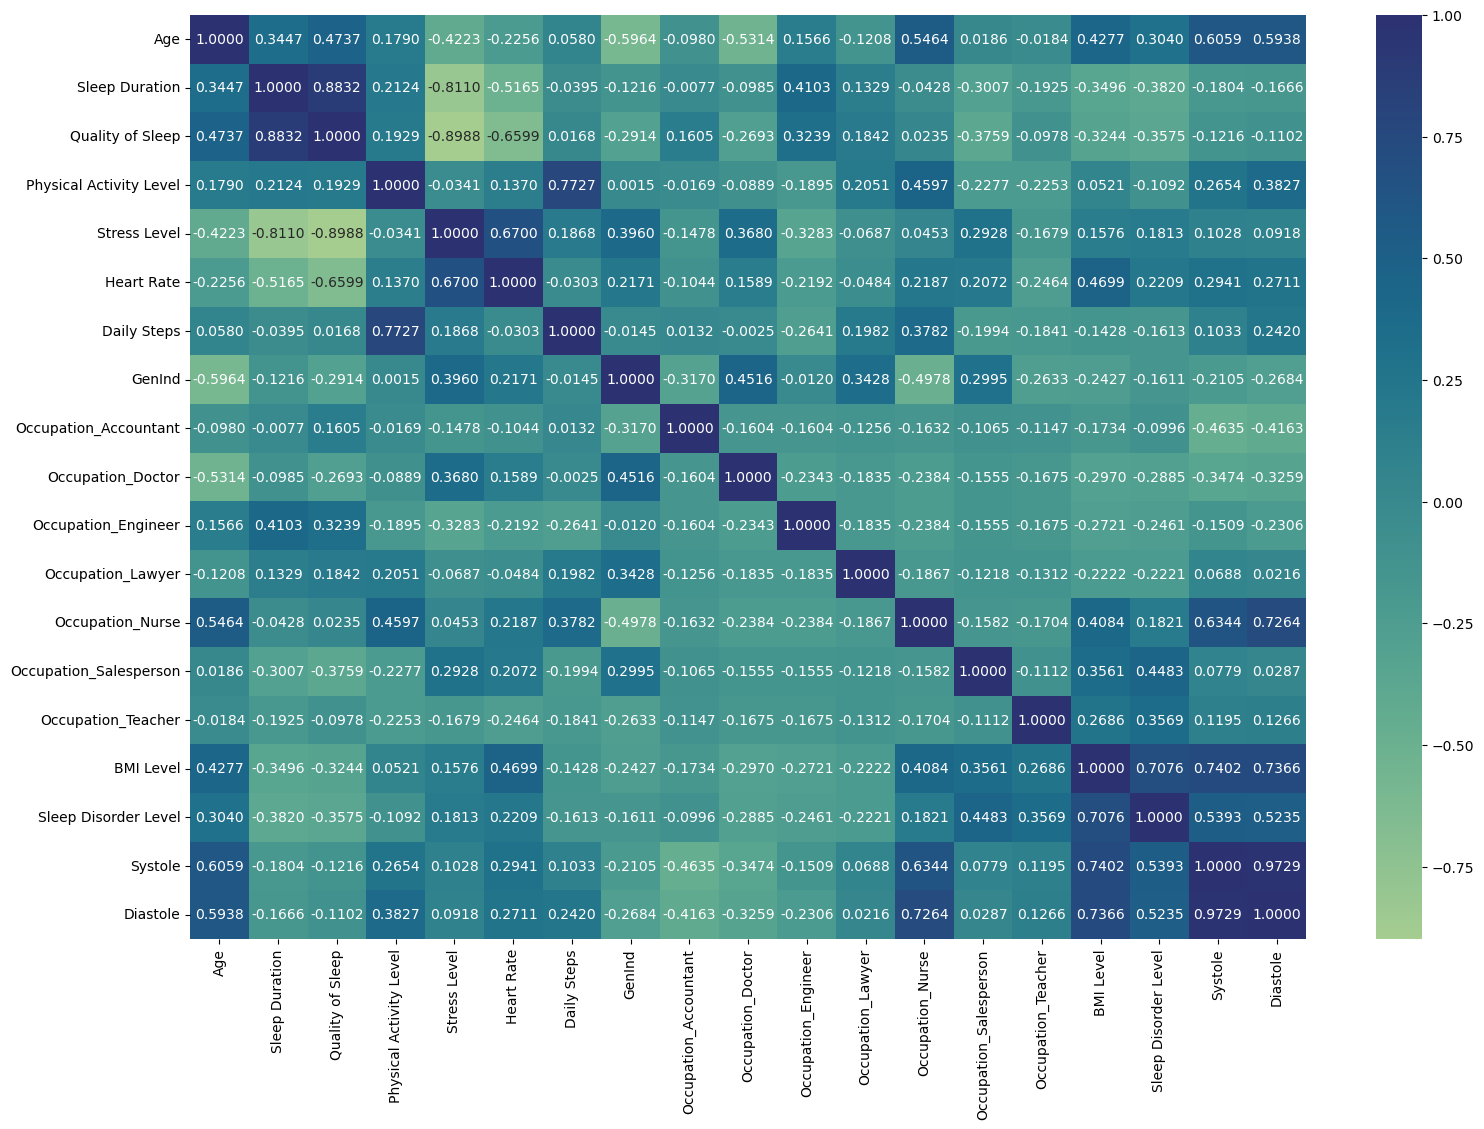

In [23]:
plt.figure(figsize=(18, 12))
rel = slpdt.corr(numeric_only=True)
sns.heatmap(rel, annot=True, fmt='.4f', cmap='crest')
plt.show()

**Observations**

- 'Daily Steps' and 'Physical Activity Level' are highly positively correlated.
- 'Quality of Sleep' and 'Sleep Duration' are highly positively correlated.
- 'Stress Level' & 'Heart Rate' are also positively correlated.
- 'Stress Level' & 'Heart Rate' has high negative correlation with 'Quality of Sleep' and 'Sleep Duration'.
- 'Systole' and 'Diastole' are highly correlated.
- 'BMI' and 'Systole/Diastole' highly correlated

# 2. Data Visualization

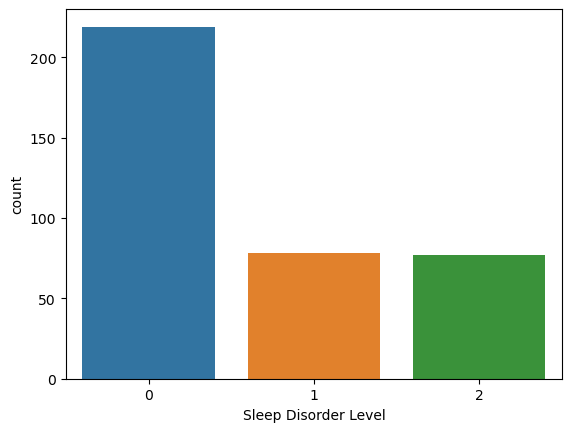

In [24]:
#Lets check the target first

sns.countplot(x = 'Sleep Disorder Level', data=slpdt)
plt.show()

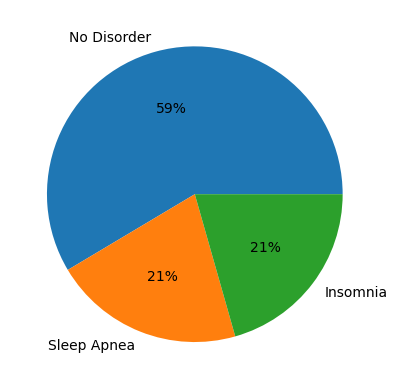

In [25]:
ydata = slpdt['Sleep Disorder Level'].value_counts()
plt.pie(ydata, labels = ['No Disorder', 'Sleep Apnea', 'Insomnia'], autopct='%.0f%%')
plt.show()

In [26]:
def feature_plotting(df, columns, plot='boxplot', label=None):
    plt.figure(figsize=(12,6))
    
    for idx, var in enumerate(columns):
        plt.subplot(3,3, idx+1)
        
        if plot == 'boxplot':
            if not label:
                g = sns.boxplot(x=var, data=df, showfliers=True)
            else:
                g = sns.boxplot(y=var, data=df, showfliers=True, x=label)
        if plot == 'histplot':
            if not label:
                g = sns.histplot(x=var, data=df, kde=True)
            else:
                g = sns.histplot(x=var, data=df, kde=True, hue=label)
        if plot == 'scatter':
            if not label:
                g = sns.scatterplot(x=var, y = df.index, data=df)
            else:
                g = sns.scatterplot(x=var, y = df.index, data=df, hue=label)
#         if plot == 'countplot':
#             if not label:
#                 g = sns.countplot(x=var, data=df)
#             else:
#                 g = sns.countplot(x=var, data=df, hue=label)
#         if plot == 'barplot':
#             if not label:
#                 g = sns.barplot(x=var, data=df)
#             else:
#                 g = sns.barplot(x=var, data=df, hue=label)
    plt.tight_layout()

In [27]:
slpdt.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'GenInd',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Nurse', 'Occupation_Salesperson',
       'Occupation_Teacher', 'BMI Level', 'Sleep Disorder Level', 'Systole',
       'Diastole'],
      dtype='object')

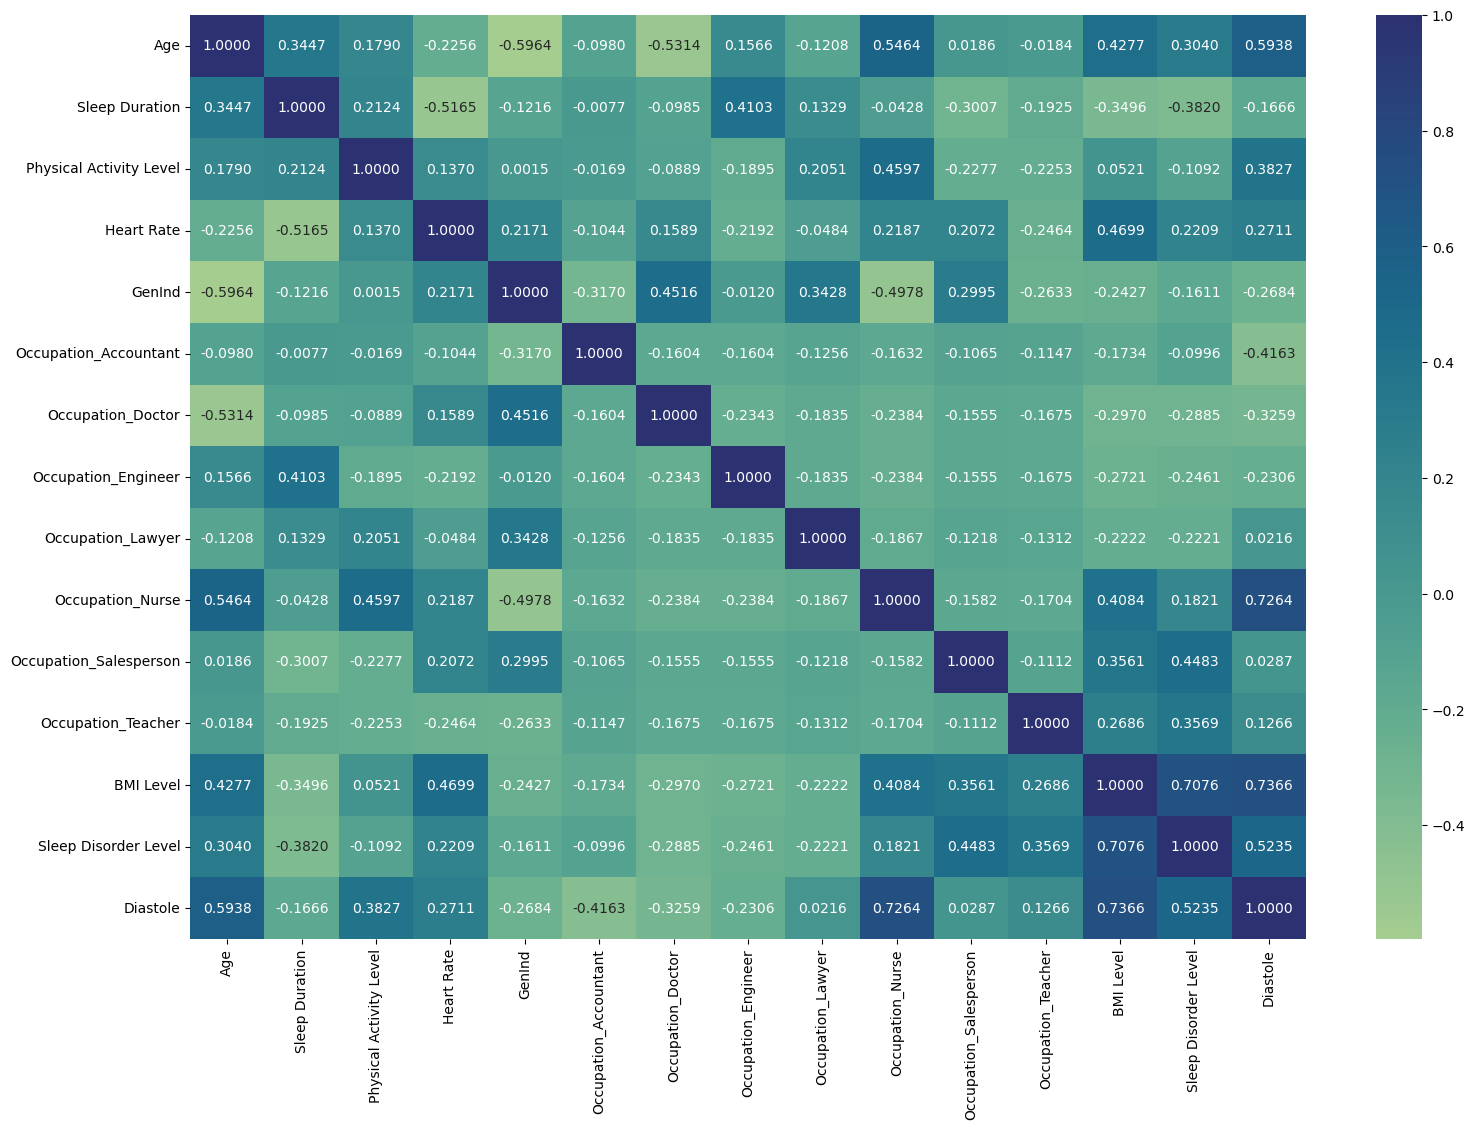

In [28]:
#From the correlation, can we remove the highly correlated columns?
plt.figure(figsize=(18, 12))
sleepdata = slpdt.drop(['Quality of Sleep', 'Daily Steps', 'Stress Level', 'Systole'], axis=1)
sns.heatmap(sleepdata.corr(numeric_only=True), annot=True, fmt='.4f', cmap='crest')
plt.show()

In [29]:
sleepdata.columns

Index(['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate',
       'GenInd', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Occupation_Teacher', 'BMI Level',
       'Sleep Disorder Level', 'Diastole'],
      dtype='object')

In [30]:
numeric = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Diastole', 'Heart Rate']

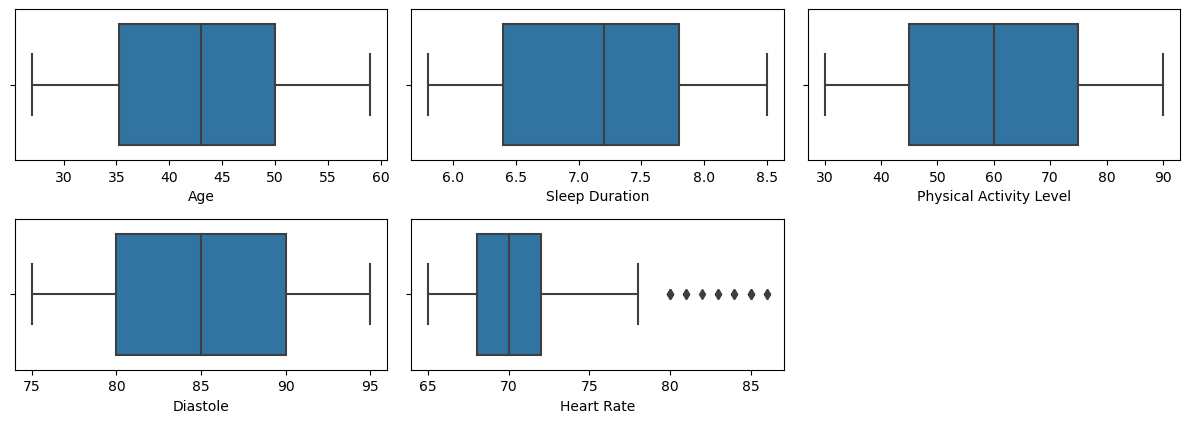

In [31]:
feature_plotting(sleepdata, numeric)

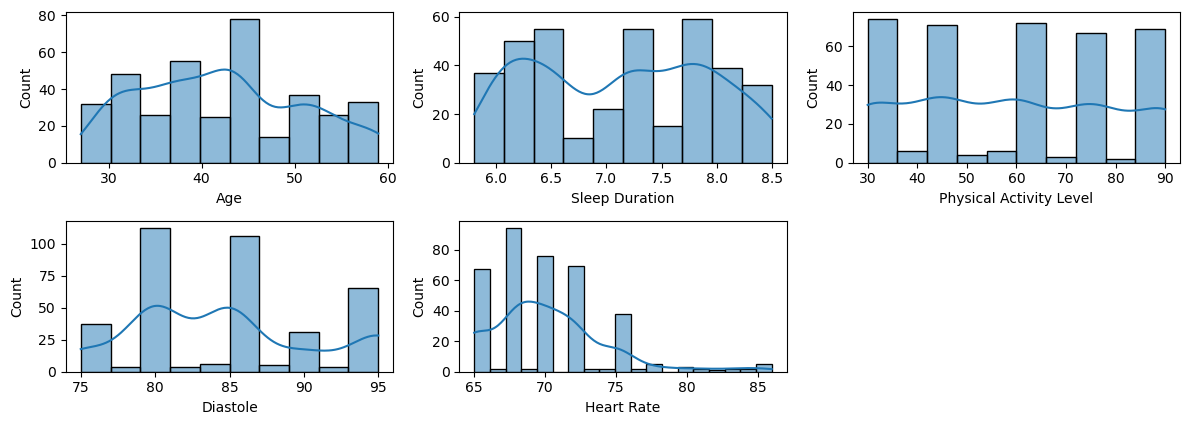

In [32]:
feature_plotting(sleepdata, numeric, plot='histplot')

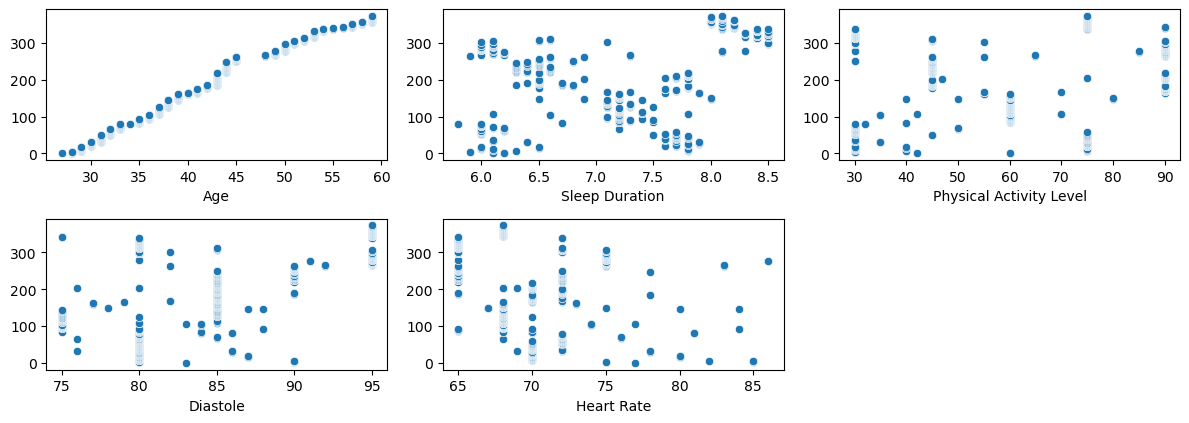

In [33]:
feature_plotting(sleepdata, numeric, plot='scatter')

In [34]:
#Maybe 'Age' column can be modified as range to form a new feature as 'Age Range'

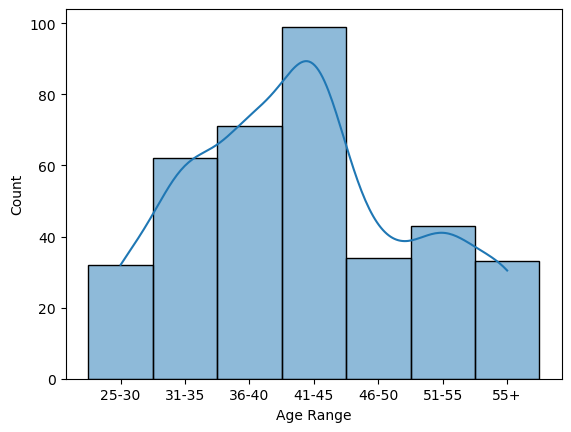

In [35]:
sleepdata['Age Range'] = np.where(sleepdata['Age']<=30, '25-30', 
                                  np.where(sleepdata['Age']<=35, '31-35',
                                          np.where(sleepdata['Age']<=40, '36-40',
                                                  np.where(sleepdata['Age']<=45, '41-45',
                                                          np.where(sleepdata['Age']<=50, '46-50',
                                                                  np.where(sleepdata['Age']<=55, '51-55', '55+'))))))


sns.histplot(x='Age Range', data=sleepdata, kde=True);

In [36]:
#On same logic lets create sleep range for each individual
#But the lower tan 6 hrs are very few are are close to 6
# lets replace those values as 6

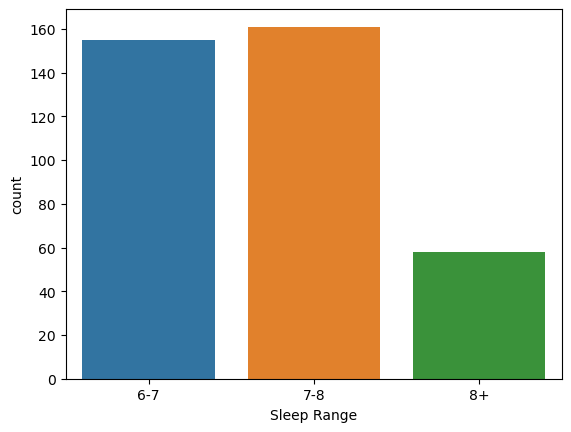

In [37]:
sleepdata['Sleep Range'] = np.where(sleepdata['Sleep Duration']<7, '6-7',
                                   np.where(sleepdata['Sleep Duration']<=8, '7-8','8+'))

sns.countplot(x = 'Sleep Range', data=sleepdata);

In [38]:
sleepdata['Diastole'].value_counts()

80    111
85    102
95     65
75     34
90     31
82      4
86      4
84      4
87      3
76      3
92      2
83      2
77      2
78      2
88      2
91      2
79      1
Name: Diastole, dtype: int64

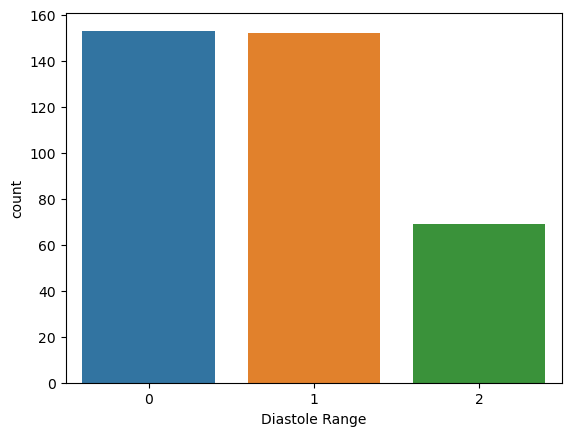

In [39]:
sleepdata['Diastole Range'] = np.where(sleepdata['Diastole']<=80, 0,
                                      np.where(sleepdata['Diastole']<=90, 1, 2))

sns.countplot(x = 'Diastole Range', data=sleepdata);

In [40]:
sleepdata.head()

,Age,Sleep Duration,Physical Activity Level,Heart Rate,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Diastole,Age Range,Sleep Range,Diastole Range
0,27,6.1,42,77,1,0,0,1,0,0,0,0,1,0,83,25-30,6-7,1
1,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25-30,6-7,0
2,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25-30,6-7,0
3,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25-30,6-7,1
4,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25-30,6-7,1


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
labelEncoder = LabelEncoder()
labelEncoder.fit(sleepdata['Age Range'])

LabelEncoder()

In [43]:
sleepdata['Age Indicator'] = labelEncoder.transform(sleepdata['Age Range'])

In [44]:
sleepdata.head()

,Age,Sleep Duration,Physical Activity Level,Heart Rate,GenInd,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Diastole,Age Range,Sleep Range,Diastole Range,Age Indicator
0,27,6.1,42,77,1,0,0,1,0,0,0,0,1,0,83,25-30,6-7,1,0
1,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25-30,6-7,0,0
2,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25-30,6-7,0,0
3,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25-30,6-7,1,0
4,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25-30,6-7,1,0


In [45]:
y = sleepdata[['Sleep Disorder Level']]
X = sleepdata.drop(columns=['Age', 'Sleep Duration', 'Diastole', 'Age Range', 'Sleep Range', 'Sleep Disorder Level'])

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
rf = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC()

In [50]:
def calculate_scores(model, X, y, scoring='accuracy', cv=5):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, error_score='raise')
    score = scores.mean()
    return score

In [51]:
#Calculate Accuracy

print('Accuracy for Random Forest: ', calculate_scores(rf, X_train, y_train.values.ravel()))
print('Accuracy for Logistic Regression: ', calculate_scores(lr, X_train, y_train.values.ravel()))
print('Accuracy for SVC: ', calculate_scores(svc, X_train, y_train.values.ravel()))

Accuracy for Random Forest:  0.8821428571428573
Accuracy for Logistic Regression:  0.8785714285714287
Accuracy for SVC:  0.5857142857142857


In [52]:
#Calculate Recall

print('F1 score for Random Forest: ', calculate_scores(rf, X_train, y_train.values.ravel(), scoring='f1_weighted'))
print('F1 score for Logistic Regression: ', calculate_scores(lr, X_train, y_train.values.ravel(), scoring='f1_weighted'))
print('F1 score for SVC: ', calculate_scores(svc, X_train, y_train.values.ravel(), scoring='f1_weighted'))

F1 score for Random Forest:  0.8859645345209616
F1 score for Logistic Regression:  0.8791912994744348
F1 score for SVC:  0.43271559900773376


In [53]:
#Lets choose Random Forest

param_grid = [
    {'n_estimators' : [100, 200, 300, 400],'criterion' : ['gini', 'entropy']}
]

grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [100, 200, 300, 400]}],
             return_train_score=True, scoring='accuracy')

In [54]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [55]:
#Calculate prediction score
predictor = RandomForestClassifier(criterion='gini')
#predictor.fit(X_train, y_train.values.ravel())
y_val = cross_val_predict(predictor, X_train, y_train, cv=5)
f1 = f1_score(y_train, y_val, average='weighted')
f1

0.8860080124900542

In [56]:
predictor.fit(X_train, y_train.values.ravel())
y_pred = predictor.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.8816573792637623